### Making an environment

D:\apps\Anaconda3\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.action_type to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.action_type` for environment variables or `env.get_wrapper_attr('action_type')` that will search the reminding wrappers.
  logger.warn(


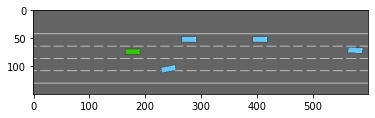

In [1]:
import gymnasium as gym
from matplotlib import pyplot as plt
%matplotlib inline

env = gym.make('highway-v0', render_mode='rgb_array')
env.reset()
for _ in range(3):
    action = env.action_type.actions_indexes["IDLE"]
    obs, reward, done, truncated, info = env.step(action)
    env.render()

plt.imshow(env.render())
plt.show()

### Configuring an environment

In [2]:
import pprint

env = gym.make("highway-v0", render_mode='rgb_array')
pprint.pprint(env.config)

{'action': {'type': 'DiscreteMetaAction'},
 'centering_position': [0.3, 0.5],
 'collision_reward': -1,
 'controlled_vehicles': 1,
 'duration': 40,
 'ego_spacing': 2,
 'high_speed_reward': 0.4,
 'initial_lane_id': None,
 'lane_change_reward': 0,
 'lanes_count': 4,
 'manual_control': False,
 'normalize_reward': True,
 'observation': {'type': 'Kinematics'},
 'offroad_terminal': False,
 'offscreen_rendering': False,
 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle',
 'policy_frequency': 1,
 'real_time_rendering': False,
 'render_agent': True,
 'reward_speed_range': [20, 30],
 'right_lane_reward': 0.1,
 'scaling': 5.5,
 'screen_height': 150,
 'screen_width': 600,
 'show_trajectories': False,
 'simulation_frequency': 15,
 'vehicles_count': 50,
 'vehicles_density': 1}


D:\apps\Anaconda3\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.config to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.config` for environment variables or `env.get_wrapper_attr('config')` that will search the reminding wrappers.
  logger.warn(


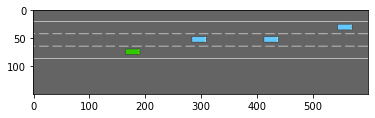

In [3]:
env.config["lanes_count"] = 3
env.reset()
plt.imshow(env.render())
plt.show()

### Training an agent

In [ ]:
!pip install protobuf==3.20.0

In [11]:
import gymnasium as gym
import highway_env
from stable_baselines3 import DQN
import time

t0=time.time()

env = gym.make("highway-fast-v0", render_mode='rgb_array')
model = DQN('MlpPolicy', env,
              policy_kwargs=dict(net_arch=[256, 256]),
              learning_rate=5e-4,
              buffer_size=2000,
              learning_starts=200,
              batch_size=32,
              gamma=0.8,
              train_freq=1,
              gradient_steps=1,
              target_update_interval=50,
              verbose=1,
              tensorboard_log="models/highway_dqn2/")
model.learn(int(2e4))
model.save("models/highway_dqn2/model")

print(f"train time: {time.time()-t0}")



Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to highway_dqn2/DQN_1
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.5      |
|    ep_rew_mean      | 5.64     |
|    exploration_rate | 0.986    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 15       |
|    time_elapsed     | 1        |
|    total_timesteps  | 30       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.9     |
|    ep_rew_mean      | 10.8     |
|    exploration_rate | 0.947    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 15       |
|    time_elapsed     | 7        |
|    total_timesteps  | 111      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.6     |


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 9.1      |
|    exploration_rate | 0.592    |
| time/               |          |
|    episodes         | 72       |
|    fps              | 14       |
|    time_elapsed     | 58       |
|    total_timesteps  | 858      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.13     |
|    n_updates        | 657      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 9.14     |
|    exploration_rate | 0.569    |
| time/               |          |
|    episodes         | 76       |
|    fps              | 14       |
|    time_elapsed     | 62       |
|    total_timesteps  | 907      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.103    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.186    |
| time/               |          |
|    episodes         | 136      |
|    fps              | 14       |
|    time_elapsed     | 117      |
|    total_timesteps  | 1714     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.469    |
|    n_updates        | 1513     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 10.3     |
|    exploration_rate | 0.157    |
| time/               |          |
|    episodes         | 140      |
|    fps              | 14       |
|    time_elapsed     | 121      |
|    total_timesteps  | 1774     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.247    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 11.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 200      |
|    fps              | 14       |
|    time_elapsed     | 189      |
|    total_timesteps  | 2732     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0282   |
|    n_updates        | 2531     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 11.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 204      |
|    fps              | 14       |
|    time_elapsed     | 191      |
|    total_timesteps  | 2768     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.163    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.5     |
|    ep_rew_mean      | 11       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 264      |
|    fps              | 14       |
|    time_elapsed     | 245      |
|    total_timesteps  | 3538     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.107    |
|    n_updates        | 3337     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.6     |
|    ep_rew_mean      | 11.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 268      |
|    fps              | 14       |
|    time_elapsed     | 250      |
|    total_timesteps  | 3602     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.155    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 11.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 328      |
|    fps              | 14       |
|    time_elapsed     | 312      |
|    total_timesteps  | 4492     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.256    |
|    n_updates        | 4291     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 11.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 332      |
|    fps              | 14       |
|    time_elapsed     | 317      |
|    total_timesteps  | 4560     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0683   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.6     |
|    ep_rew_mean      | 11.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 392      |
|    fps              | 14       |
|    time_elapsed     | 370      |
|    total_timesteps  | 5311     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0479   |
|    n_updates        | 5110     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 11.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 396      |
|    fps              | 14       |
|    time_elapsed     | 373      |
|    total_timesteps  | 5365     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.117    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 12.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 456      |
|    fps              | 14       |
|    time_elapsed     | 445      |
|    total_timesteps  | 6395     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.185    |
|    n_updates        | 6194     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 12.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 460      |
|    fps              | 14       |
|    time_elapsed     | 449      |
|    total_timesteps  | 6454     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0537   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21       |
|    ep_rew_mean      | 16.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 520      |
|    fps              | 14       |
|    time_elapsed     | 545      |
|    total_timesteps  | 7820     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.203    |
|    n_updates        | 7619     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.4     |
|    ep_rew_mean      | 17       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 524      |
|    fps              | 14       |
|    time_elapsed     | 552      |
|    total_timesteps  | 7926     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.07     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.1     |
|    ep_rew_mean      | 16.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 584      |
|    fps              | 14       |
|    time_elapsed     | 633      |
|    total_timesteps  | 9118     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0124   |
|    n_updates        | 8917     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.2     |
|    ep_rew_mean      | 16.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 588      |
|    fps              | 14       |
|    time_elapsed     | 638      |
|    total_timesteps  | 9191     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0156   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19       |
|    ep_rew_mean      | 15.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 648      |
|    fps              | 14       |
|    time_elapsed     | 716      |
|    total_timesteps  | 10327    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0216   |
|    n_updates        | 10126    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.1     |
|    ep_rew_mean      | 15.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 652      |
|    fps              | 14       |
|    time_elapsed     | 721      |
|    total_timesteps  | 10411    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0449   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.3     |
|    ep_rew_mean      | 16.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 712      |
|    fps              | 14       |
|    time_elapsed     | 818      |
|    total_timesteps  | 11805    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.266    |
|    n_updates        | 11604    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.7     |
|    ep_rew_mean      | 17.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 716      |
|    fps              | 14       |
|    time_elapsed     | 826      |
|    total_timesteps  | 11913    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.106    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.5     |
|    ep_rew_mean      | 17       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 776      |
|    fps              | 14       |
|    time_elapsed     | 912      |
|    total_timesteps  | 13163    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0826   |
|    n_updates        | 12962    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.8     |
|    ep_rew_mean      | 17.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 780      |
|    fps              | 14       |
|    time_elapsed     | 920      |
|    total_timesteps  | 13283    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0088   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.6     |
|    ep_rew_mean      | 17.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 840      |
|    fps              | 14       |
|    time_elapsed     | 1015     |
|    total_timesteps  | 14631    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0171   |
|    n_updates        | 14430    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.4     |
|    ep_rew_mean      | 17.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 844      |
|    fps              | 14       |
|    time_elapsed     | 1020     |
|    total_timesteps  | 14703    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0241   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.3     |
|    ep_rew_mean      | 17.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 904      |
|    fps              | 14       |
|    time_elapsed     | 1119     |
|    total_timesteps  | 16107    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0253   |
|    n_updates        | 15906    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22       |
|    ep_rew_mean      | 17.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 908      |
|    fps              | 14       |
|    time_elapsed     | 1125     |
|    total_timesteps  | 16198    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0986   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.3     |
|    ep_rew_mean      | 18.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 968      |
|    fps              | 14       |
|    time_elapsed     | 1221     |
|    total_timesteps  | 17575    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.013    |
|    n_updates        | 17374    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.4     |
|    ep_rew_mean      | 18.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 972      |
|    fps              | 14       |
|    time_elapsed     | 1226     |
|    total_timesteps  | 17648    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.00455  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.3     |
|    ep_rew_mean      | 17       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1032     |
|    fps              | 14       |
|    time_elapsed     | 1322     |
|    total_timesteps  | 18949    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0167   |
|    n_updates        | 18748    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.1     |
|    ep_rew_mean      | 16.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1036     |
|    fps              | 14       |
|    time_elapsed     | 1330     |
|    total_timesteps  | 19053    |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0855   |
|    n_updates      

In [ ]:
# Load and test saved model
import gymnasium as gym
import highway_env
from stable_baselines3 import DQN


from matplotlib import pyplot as plt
# %matplotlib inline
%matplotlib

plt.ion()
plt.figure(1)


env = gym.make("highway-fast-v0", render_mode='rgb_array')
model = DQN.load("models/highway_dqn/model")

k=0
while True:
    done = truncated = False
    obs, info = env.reset()
    k+=1
    print(f"---k: {k} ---")
    j=0
    while not (done or truncated):
        j+=1
#         print(f"---j: {j} ---")
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, truncated, info = env.step(action)
        env.render()
        plt.imshow(env.render())
#         plt.show()
        plt.draw()
        plt.pause(0.1)

In [1]:
from stable_baselines3 import PPO

In [2]:
PPO??

In [7]:
import gymnasium as gym
import highway_env
from stable_baselines3 import PPO
import time

t0=time.time()

env = gym.make("highway-fast-v0", render_mode='rgb_array')
model = PPO('MlpPolicy', env,
              policy_kwargs=dict(net_arch=[256, 256]),
              learning_rate=5e-4,
              n_steps=2048,
              n_epochs=10,
              batch_size=32,
              gamma=0.99,
              gae_lambda=0.95,
              clip_range=0.2,
              verbose=1,
              tensorboard_log="models/highway_ppo1/")
model.learn(int(2e4))
model.save("models/highway_ppo1/model")

print(f"train time: {time.time()-t0}")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to highway_ppo1/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 10.1     |
|    ep_rew_mean     | 7.43     |
| time/              |          |
|    fps             | 10       |
|    iterations      | 1        |
|    time_elapsed    | 192      |
|    total_timesteps | 2048     |
---------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 14.3      |
|    ep_rew_mean          | 10.6      |
| time/                   |           |
|    fps                  | 11        |
|    iterations           | 2         |
|    time_elapsed         | 367       |
|    total_timesteps      | 4096      |
| train/                  |           |
|    approx_kl            | 0.0157555 |
|    clip_fraction        | 0.267     |
|    clip_range           | 0.2       |
|    entropy_lo

train time: 1545.8865559101105


In [6]:
DQN.load??

In [ ]:
# Load and test saved model
import gymnasium as gym
import highway_env
from stable_baselines3 import PPO


from matplotlib import pyplot as plt
# %matplotlib inline
%matplotlib

plt.ion()
plt.figure(1)


env = gym.make("highway-fast-v0", render_mode='rgb_array')
model = PPO.load("models/highway_ppo1/model")

k=0
while True:
    done = truncated = False
    obs, info = env.reset()
    k+=1
    print(f"---k: {k} ---")
    j=0
    while not (done or truncated):
        j+=1
#         print(f"---j: {j} ---")
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, truncated, info = env.step(action)
        env.render()
        plt.imshow(env.render())
#         plt.show()
        plt.draw()
        plt.pause(0.1)

Using matplotlib backend: Qt5Agg
---k: 1 ---
---k: 2 ---
---k: 3 ---
---k: 4 ---
---k: 5 ---
---k: 6 ---
---k: 7 ---
---k: 8 ---
---k: 9 ---
---k: 10 ---
---k: 11 ---
---k: 12 ---
---k: 13 ---
---k: 14 ---
---k: 15 ---
---k: 16 ---
---k: 17 ---
---k: 18 ---


In [2]:
??model.learn